# Feature Engineering: Feature Creation

### Read in text

In [1]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [2]:
# we are going to work under the hypothesis that spam messages tend to be longer than real text message

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


### Create feature for % of text that is punctuation

In [4]:
import string

# we'll say one for char in text if char in string.punctation and then we'll assign that back to count
# so everytime it founds punctuation in a given text message, send one back, and what we need to do next is sum up of those ones
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")),3)*100

# apply it in lambda function

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()


,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
2,ham,Even my brother is not like to speak with me. ...,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135,4.4


### Evaluate created feature

Now we've created new features, we want to evaluate those features to see if they might be providing any new value to the model for distinguish spam from non-spam.

In [5]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

/Users/clo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/clo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


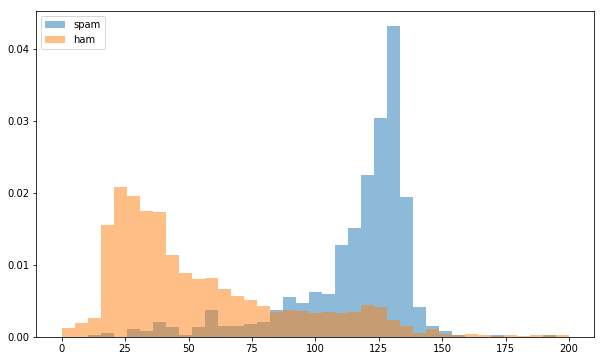

In [15]:
# this would return an array with 40 evenly spaced number between zero and 200
bins = np.linspace(0, 200, 40)

pyplot.figure(figsize=(10,6))
pyplot.hist(data[data['label'] == 'spam']['body_len'], bins, alpha = 0.5, normed=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['body_len'], bins, alpha = 0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

From the figure above, we can see that body length is very different for ham versus spam.

/Users/clo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/clo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


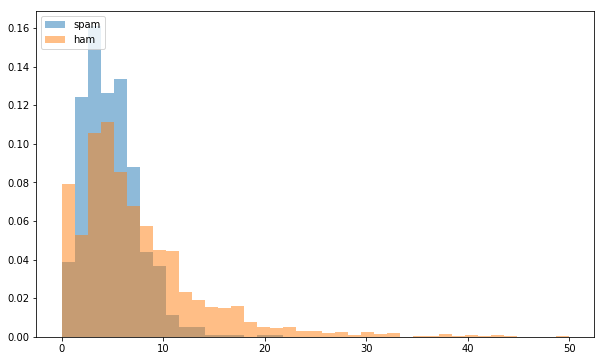

In [18]:
# this would return an array with 40 evenly spaced number between zero and 200
bins = np.linspace(0, 50, 40)

pyplot.figure(figsize=(10,6))
pyplot.hist(data[data['label'] == 'spam']['punct%'], bins, alpha = 0.5, normed=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['punct%'], bins, alpha = 0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()